In [ ]:
#importing necessary libraries
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.applications import MobileNet

In [ ]:
#printing list of directory and storing it in list
path = "asl_alphabet_train/asl_alphabet_train"
actual = sorted(os.listdir(path))
print(actual)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [ ]:
#creating image data generator object 
data_gen = ImageDataGenerator(
                            rescale = 1/255.0,
                            validation_split = 0.1,
                            )

In [ ]:
#spliting data into test and validation set
train_data_gen = data_gen.flow_from_directory(path, target_size = (224, 224), batch_size = 64, shuffle = True,  subset = "training")
validation_data_gen = data_gen.flow_from_directory(path, target_size = (224, 224), batch_size = 64,  shuffle = True, subset = "validation")

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [ ]:
#creating model using transfer learning and MobileNet as base model
base = MobileNet(input_shape=(224,224,3), include_top=False)
base.trainable = False

model = Sequential()

model.add(base)

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               25690624  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 29)                14877     
                                                                 
Total params: 28,934,365
Trainable params: 25,705,501
Non-trainable params: 3,228,864
__________________________________

In [ ]:
#compiling model with earlystopping callback, adam as optimizer and categorical cross entropy as loss
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=2)
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics =['accuracy'])

In [ ]:
#Training model
history = model.fit(train_data_gen, epochs = 50, validation_data = validation_data_gen, callbacks = [early_stop])

Epoch 1/50
1224/1224 [==============================] - 227s 184ms/step - loss: 1.2387 - accuracy: 0.6662 - val_loss: 0.4206 - val_accuracy: 0.8706
Epoch 2/50
1224/1224 [==============================] - 222s 181ms/step - loss: 0.5503 - accuracy: 0.8213 - val_loss: 0.3657 - val_accuracy: 0.8916
Epoch 3/50
1224/1224 [==============================] - 226s 184ms/step - loss: 0.4901 - accuracy: 0.8465 - val_loss: 0.2644 - val_accuracy: 0.9166
Epoch 4/50
1224/1224 [==============================] - 227s 185ms/step - loss: 0.4361 - accuracy: 0.8679 - val_loss: 0.3641 - val_accuracy: 0.9098
Epoch 5/50
1224/1224 [==============================] - 224s 183ms/step - loss: 0.4473 - accuracy: 0.8713 - val_loss: 0.3945 - val_accuracy: 0.9016


In [ ]:
#importing libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#taking a n image from validation set to test
img1 = validation_data_gen[1][0][1]
label = np.argmax(validation_data_gen[1][1][1])

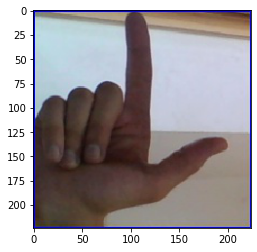

In [ ]:
#ploting image
plt.imshow(img1)

In [ ]:
#printing actual label
actual[label]

'L'

In [ ]:
#predicting value
res = model.predict(np.expand_dims(validation_data_gen[1][0][1], axis= 0))

In [ ]:
#printing actual class
actual[np.argmax(res, axis = -1)[0]]

'L'

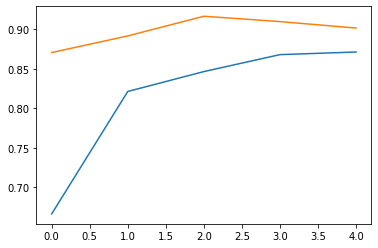

In [ ]:
#ploting accuracy history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

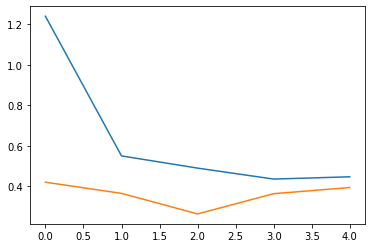

In [ ]:
#ploting loss history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
#testing model on test data
test = data_gen.flow_from_directory('/content/asl_alphabet_test' , target_size = (224, 224))
model.evaluate(test)

1/1 [==============================] - 0s 171ms/step - loss: 2.4664e-08 - accuracy: 1.0000


[2.4663982856054645e-08, 1.0]

In [ ]:
#saving the model
model.save('asl_predictor.h5')